# Reconocimiento de Patrones
[Curso de Reconocimiento de Patrones]

Departamento Electrónica

Universidad Poipular del Cesar

José Ramón Iglesias

---

# Ejemplos de Uso de Clasficacores

En estos ejemplos se muestra distintos clasificadores en datos simulados.




# Setup inicial

Liberías necesarias para que funcione el algoritmo.

## Setup de librerías

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
from   sklearn.metrics import confusion_matrix, accuracy_score
import seaborn as sns
from   tqdm.auto import tqdm
from   IPython.display import clear_output


## Carga de base de datos

En estos ejemplos usaremos las siguientes bases de datos de características para probar clasificadores:


* F2:  Training data: 800 samples with 2 features. Testing data: 400 samples with 2 features. Classes: 0...1

* G2: Training data: 800 samples with 2 features
 Testing data: 200 samples with 2 features. Classes: 1...2

* G3: Training data: 1200 samples with 2 features. Testing data: 600 samples with 2 features. Classes: 1...3

* G4: Training data: 800 samples with 2 features .Testing data: 400 samples with 2 features. Classes: 1...4

* P2: Training data: 1052 samples with 2 features. Testing data: 262 samples with 2 features. Classes: 0...1



In [ ]:
!wget https://www.dropbox.com/s/4knnagipqowhn7s/F2.zip?dl=0
!unzip F2

!wget https://www.dropbox.com/s/l7nvckkpl821b0q/G2.zip?dl=0
!unzip G2

!wget https://www.dropbox.com/s/wnm9zcfz9fd0g6e/G3.zip?dl=0
!unzip G3

!wget https://www.dropbox.com/s/3r634emj92o0tyy/G4.zip?dl=0
!unzip G4

!wget https://www.dropbox.com/s/q5dqgrlzj8cbc8p/P2.zip?dl=0
!unzip P2

clear_output()

print('Datos F2, F40, G3, G4 y P2 cargadas.')


Datos F2, F40, G3, G4 y P2 cargadas.


## Funciones necesarias

In [2]:
def load_features(prefix):
    Xtrain  = np.load(prefix+'_Xtrain.npy')            # training samples
    Xtest = np.load(prefix+'_Xtest.npy')             # testing samples
    ytrain  = np.ravel(np.load(prefix+'_dtrain.npy'))  # training labels
    ytest = np.ravel(np.load(prefix+'_dtest.npy'))   # testing labels
    print('Training data: '+str(Xtrain.shape[0]) +' samples with '+str(Xtrain.shape[1]) +' features')
    print(' Testing data: '+str(Xtest.shape[0])+' samples with '+str(Xtest.shape[1])+' features')
    print('      Classes: '+str(int(np.min(ytrain)))+'...'+str(int(np.max(ytrain))))
    return Xtrain,ytrain,Xtest,ytest

def print_confusion(dt,ds,show_heatmap=0,Cnorm=1):
    # dt - true, ds - predicted
    C   = confusion_matrix(dt,ds) 
    print('Confusion Matrix:')
    print(C)
    acc = accuracy_score(dt,ds) 
    acc_st = "{:.2f}".format(acc*100)
    print('Accuracy = '+str(acc_st))
    if show_heatmap:
      sns.heatmap(C/Cnorm, annot=True, cbar=None, cmap="Blues")
      plt.title("Confusion Matrix"), plt.tight_layout()
      plt.ylabel("True Class"), plt.xlabel("Predicted Class")
      plt.show()

def plot_features(X,d,st,show=1):
    dmin = int(np.min(d)) 
    dmax = int(np.max(d)) 
    #colors = np.array(["red","green","blue","yellow","pink","black","orange","purple","beige","brown","gray","cyan","magenta"])
    #colors = 'Greens'
    for j in range(dmin,dmax+1):
        plt.scatter(X[d==j,0],X[d==j,1],label=str(j),s=27)
    plt.grid(True)
    plt.legend()
    plt.xlabel('$x_1$',fontsize=14)
    plt.ylabel('$x_2$',fontsize=14)
    plt.title('Feature Space - '+st,fontsize=14)
    if show==1:
        plt.show()

def plot_features3(X,d,st,show=1,view=(30,60)):
    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')
    ax.scatter(X[:, 0], X[:, 1], X[:, 2], c=d, cmap=plt.cm.autumn)
    ax.set_xlabel('$x_1$',fontsize=14)
    ax.set_ylabel('$x_2$',fontsize=14)
    ax.set_zlabel('$x_3$',fontsize=14)
    plt.title('Feature Space - '+st,fontsize=14)
    ax.view_init(view[0],view[1])
    # plt.axis('off')
    # plt.grid(b=None)
    if show == 1:
        plt.show()

def plot_decision_lines(clf,X,show=0,decisionline=1):
    # based on example of https://scikit-learn.org
    h = 0.075
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
    if decisionline == 1:
        Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
        Z = Z.reshape(xx.shape)
        plt.contourf(xx, yy, Z, cmap=plt.cm.Reds, alpha=0.8)
    plt.xlim(x_min, x_max)
    plt.ylim(y_min, y_max)
    if show==1:
        plt.show()

def show_clf_results(clf,X,d,Xt,dt,d0,ds,st,decisionline=1):
    gs = gridspec.GridSpec(1, 2)
    fig = plt.figure(figsize=(18, 6))
    print('Training:')
    acc = accuracy_score(d,d0) 
    accst = f'Acc = {acc:.4f}'    
    ax = plt.subplot(gs[0,0])
    print_confusion(d,d0)                             # confusion matrix in training
    plot_decision_lines(clf,X,0,decisionline)          # decision lines
    plot_features(X,d,st+' - Training: '+accst,0)     # feature space in training   
    ax = plt.subplot(gs[0,1])
    print('Testing:')
    acc = accuracy_score(ds,dt) 
    accst = f'Acc = {acc:.4f}'    
    print_confusion(dt,ds)                            # confusion matrix in testing
    plot_decision_lines(clf,X,0,decisionline)          # decision lines
    plot_features(Xt,dt,st+' - Testing: '+accst,1)    # feature space in testing


# Training/Testing Data

Cargando G2...
Training data: 800 samples with 2 features
 Testing data: 200 samples with 2 features
      Classes: 1...2


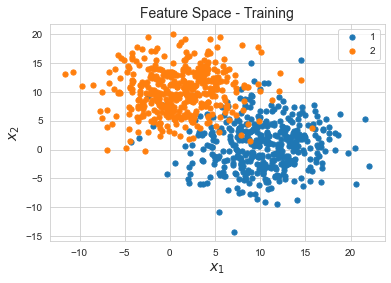

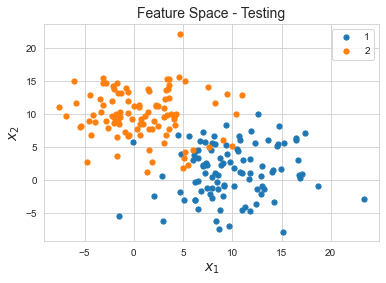

In [3]:
data = 'G2' # <= puede ser 'G2','G3','G4','P2','F2' (ver explicación más arriba)
print('Cargando '+data+'...')

Xtrain,ytrain,Xtest,ytest   = load_features(data + '/' + data)   # load training and testing data

plot_features(Xtrain,ytrain,'Training')
plot_features(Xtest,ytest,'Testing')


           x_1        x_2  clases
0     8.351895   7.657450       1
1    13.706550   7.381535       1
2     2.745745   5.097653       1
3    13.231357   0.675569       1
4    10.659820   6.656517       1
..         ...        ...     ...
795   5.149067  12.440202       2
796  -3.713440  15.327143       2
797  -3.440172   8.704228       2
798  -0.840925   7.592962       2
799   2.269335   6.004864       2

[800 rows x 3 columns]


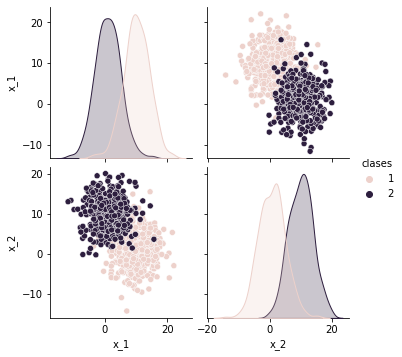

In [ ]:

df1 = pd.DataFrame(Xtrain, columns = ['x_1','x_2'])
df2 = pd.DataFrame(ytrain.astype(int),columns = ['clases'])
df = pd.concat([df1, df2], axis=1)
print(df)
sns.pairplot(df,hue='clases')
#sns.scatterplot(data=df, x="x_1", y="x_2", hue="clases",palette="deep")

# KNN

## KNN - pasos fundamentales

In [ ]:
# 1. Definición del Clasificador
from sklearn.neighbors import KNeighborsClassifier
n_vecinos = 5
clf = KNeighborsClassifier(n_neighbors=n_vecinos)

# 2. Entrenamiento
clf.fit(Xtrain, ytrain)

# 3. Predicción en el Testing
ypred = clf.predict(Xtest)

# 4. Accuracy
acc	 = accuracy_score(ypred,ytest)
print('Acc = '+str(acc*100))

Acc = 92.0


## KNN - Gráficas

Training:
Confusion Matrix:
[[379  21]
 [ 21 379]]
Accuracy = 94.75
Testing:
Confusion Matrix:
[[95  5]
 [11 89]]
Accuracy = 92.00


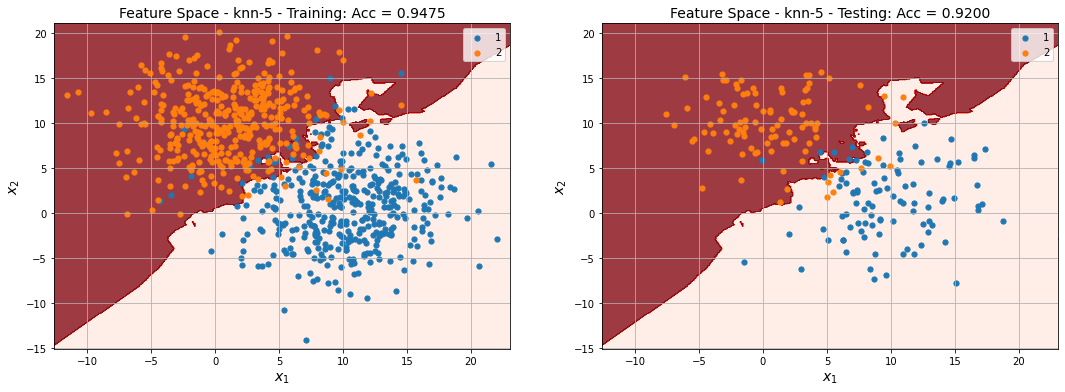

In [ ]:
knn_st = 'knn-'+str(n_vecinos)

clf = KNeighborsClassifier(n_neighbors=n_vecinos)
clf.fit(Xtrain, ytrain)
ypred        = clf.predict(Xtest)
y0           = clf.predict(Xtrain)

show_clf_results(clf,Xtrain,ytrain,
                 Xtest,ytest,y0,ypred,knn_st)    # show performance and feature space

## KNN - búsquedad de número de vecinos

1 > 0.905*** max
2 > 0.91*** max
3 > 0.915*** max
4 > 0.925*** max
12 > 0.93*** max
23 > 0.935*** max
59 > 0.94*** max


Text(0.5, 0, 'n_vecinos')

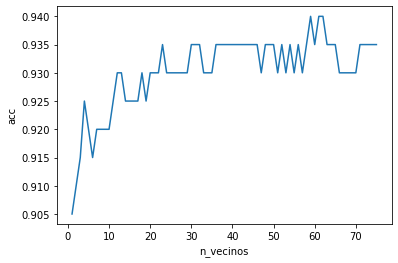

In [ ]:
n = 75
acc_knn = np.zeros((n,))
acc_max = 0
for j in range(n):
  k = j+1
  clf = KNeighborsClassifier(n_neighbors=k)
  clf.fit(Xtrain, ytrain)
  ypred        = clf.predict(Xtest)
  acc_knn[j]   = accuracy_score(ypred,ytest)
  if acc_knn[j]>acc_max:
    acc_max = acc_knn[j]
    kmax = k
    print(str(k)+' > '+str(acc_knn[j])+'*** max')

plt.plot(range(1,n+1),acc_knn)
plt.ylabel('acc')
plt.xlabel('n_vecinos')

# Dmin

Training:
Confusion Matrix:
[[373  27]
 [ 16 384]]
Accuracy = 94.62
Testing:
Confusion Matrix:
[[96  4]
 [10 90]]
Accuracy = 93.00


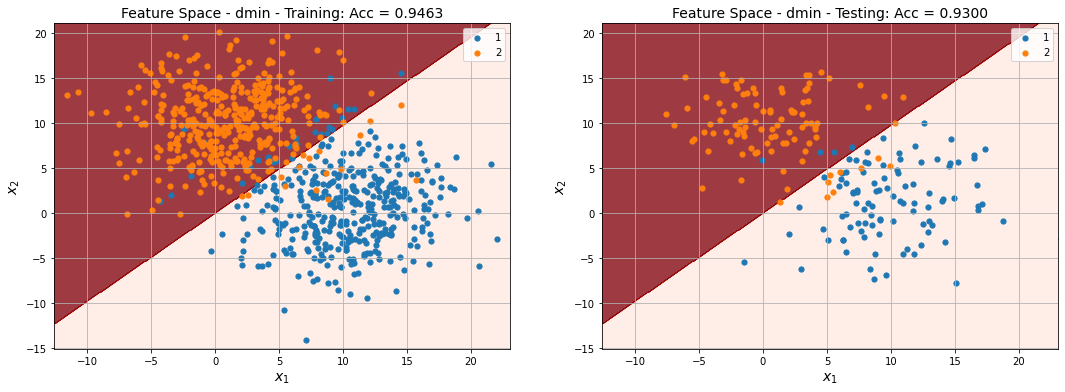

In [ ]:
from   sklearn.neighbors import NearestCentroid

clf = NearestCentroid()
clf.fit(Xtrain, ytrain)
ypred        = clf.predict(Xtest)
y0           = clf.predict(Xtrain)

show_clf_results(clf,Xtrain,ytrain,
                 Xtest,ytest,y0,ypred,'dmin')    # show performance and feature space

# Bayes

## Bayes - KDE

In [ ]:
from sklearn.base import BaseEstimator, ClassifierMixin
from sklearn.neighbors import KernelDensity

class KDEClassifier(BaseEstimator, ClassifierMixin):
    """Bayesian generative classification based on KDE
    from https://jakevdp.github.io/PythonDataScienceHandbook/05.13-kernel-density-estimation.html
    
    Parameters
    ----------
    bandwidth : float
        the kernel bandwidth within each class
    kernel : str
        the kernel name, passed to KernelDensity
    """
    def __init__(self, bandwidth=1.0, kernel='gaussian'):
        self.bandwidth = bandwidth
        self.kernel = kernel
        
    def fit(self, X, y):
        self.classes_ = np.sort(np.unique(y))
        training_sets = [X[y == yi] for yi in self.classes_]
        self.models_ = [KernelDensity(bandwidth=self.bandwidth,
                                      kernel=self.kernel).fit(Xi)
                        for Xi in training_sets]
        self.logpriors_ = [np.log(Xi.shape[0] / X.shape[0])
                           for Xi in training_sets]
        return self
        
    def predict_proba(self, X):
        logprobs = np.array([model.score_samples(X)
                             for model in self.models_]).T
        result = np.exp(logprobs + self.logpriors_)
        return result / result.sum(1, keepdims=True)
        
    def predict(self, X):
        return self.classes_[np.argmax(self.predict_proba(X), 1)]

Training:
Confusion Matrix:
[[383  17]
 [ 16 384]]
Accuracy = 95.88
Testing:
Confusion Matrix:
[[96  4]
 [12 88]]
Accuracy = 92.00


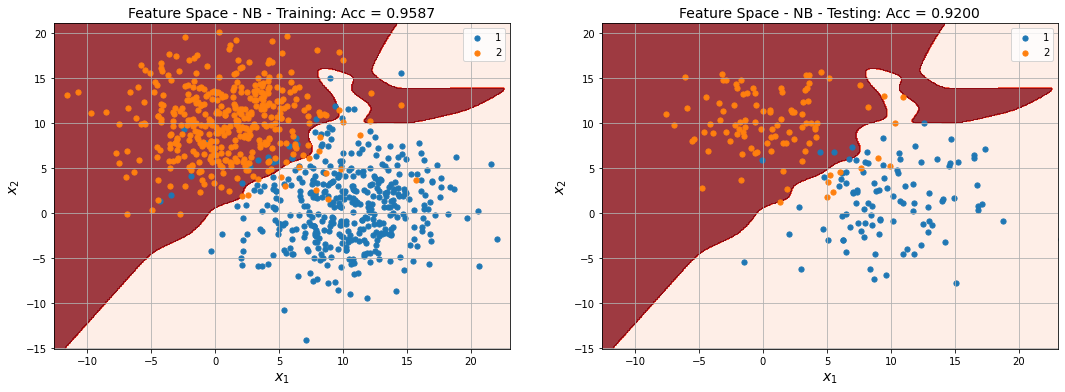

In [ ]:
clf = KDEClassifier(bandwidth=1.0)
clf.fit(Xtrain, ytrain)
ypred        = clf.predict(Xtest)
y0           = clf.predict(Xtrain)

show_clf_results(clf,Xtrain,ytrain,
                 Xtest,ytest,y0,ypred,'NB')    # show performance and feature space

## Naïve - Bayes

Training:
Confusion Matrix:
[[373  27]
 [ 16 384]]
Accuracy = 94.62
Testing:
Confusion Matrix:
[[96  4]
 [10 90]]
Accuracy = 93.00


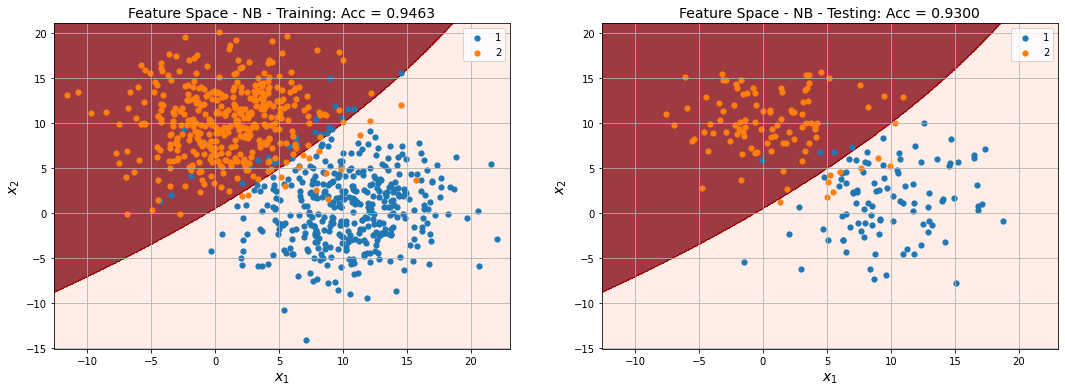

In [ ]:
from sklearn.naive_bayes import GaussianNB

clf = GaussianNB()
clf.fit(Xtrain, ytrain)
ypred        = clf.predict(Xtest)
y0           = clf.predict(Xtrain)

show_clf_results(clf,Xtrain,ytrain,
                 Xtest,ytest,y0,ypred,'NB')    # show performance and feature space

# LDA

Training:
Confusion Matrix:
[[373  27]
 [ 16 384]]
Accuracy = 94.62
Testing:
Confusion Matrix:
[[96  4]
 [ 9 91]]
Accuracy = 93.50


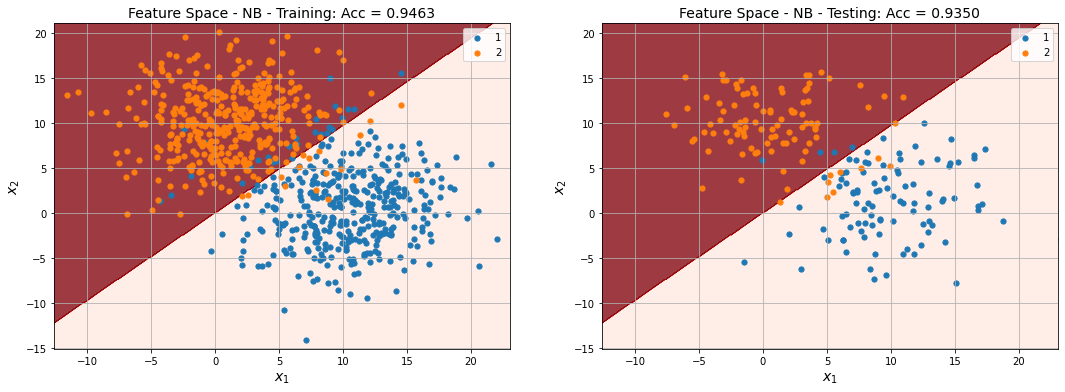

In [ ]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
clf = LinearDiscriminantAnalysis()
clf.fit(Xtrain, ytrain)
ypred        = clf.predict(Xtest)
y0           = clf.predict(Xtrain)

show_clf_results(clf,Xtrain,ytrain,
                 Xtest,ytest,y0,ypred,'NB')    # show performance and feature space

# QDA

Training:
Confusion Matrix:
[[373  27]
 [ 16 384]]
Accuracy = 94.62
Testing:
Confusion Matrix:
[[96  4]
 [10 90]]
Accuracy = 93.00


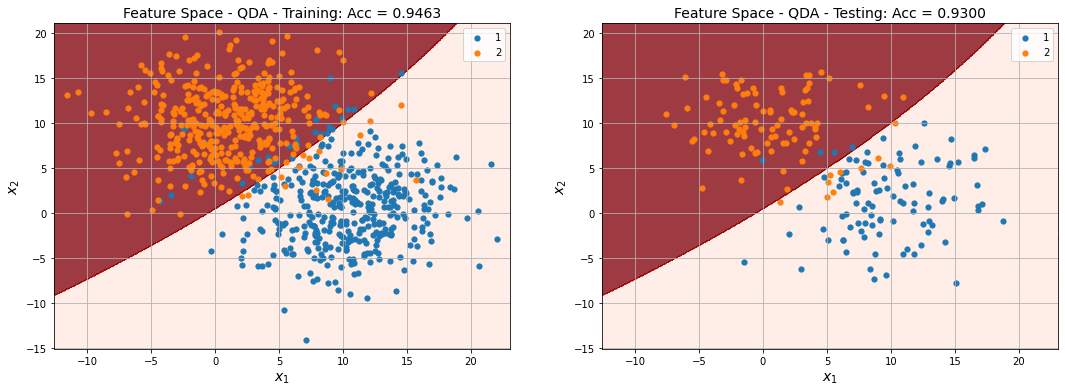

In [ ]:
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
clf = QuadraticDiscriminantAnalysis()
clf.fit(Xtrain, ytrain)
ypred        = clf.predict(Xtest)
y0           = clf.predict(Xtrain)

show_clf_results(clf,Xtrain,ytrain,
                 Xtest,ytest,y0,ypred,'QDA')    # show performance and feature space

# Mahalanobis

In [ ]:
from sklearn.base import BaseEstimator, ClassifierMixin

class Mahalanobis(BaseEstimator, ClassifierMixin):

    def __init__(self, covi=1):
        self.covi = covi # 0 covi = Cte, 1 = covi is different
        
    def fit(self, X, y):
        self.classes  = np.sort(np.unique(y))
        training_sets = [X[y == yi] for yi in self.classes]
        m             = X.shape[1]
        n             = len(self.classes)
        self.mc       = np.zeros((n,m))
        self.Ck       = np.zeros((m,m,n))
        for k in range(n):
            Xk             = training_sets[k]
            self.mc[k]     = np.mean(Xk,axis=0)
            self.Ck[:,:,k] = np.cov(Xk.T)
        if self.covi == 0:
            C       = np.zeros((m,m))
            for k in range(n):
                C  = C + self.Ck[:,:,k]
                C = C/n
            for k in range(n):
                self.Ck[:,:,k] = C
        for k in range(n):
            self.Ck[:,:,k] = np.linalg.inv(self.Ck[:,:,k])
        return self

    def predict_distances(self, Xt):
        n = len(self.classes)
        nt = Xt.shape[0]
        distances = np.zeros((nt,n))
        for k in range(n):
            mk = self.mc[k]
            for i in range(nt):
                xdi  = Xt[i]-mk
                dik   = np.matmul(xdi, self.Ck[:,:,k])
                distances[i,k] = dik.dot(xdi)
        return distances
            
    def predict(self, X):
        return self.classes[np.argmin(self.predict_distances(X), 1)]

## Mahalanobis - 0

Training:
Confusion Matrix:
[[373  27]
 [ 16 384]]
Accuracy = 94.62
Testing:
Confusion Matrix:
[[96  4]
 [ 9 91]]
Accuracy = 93.50


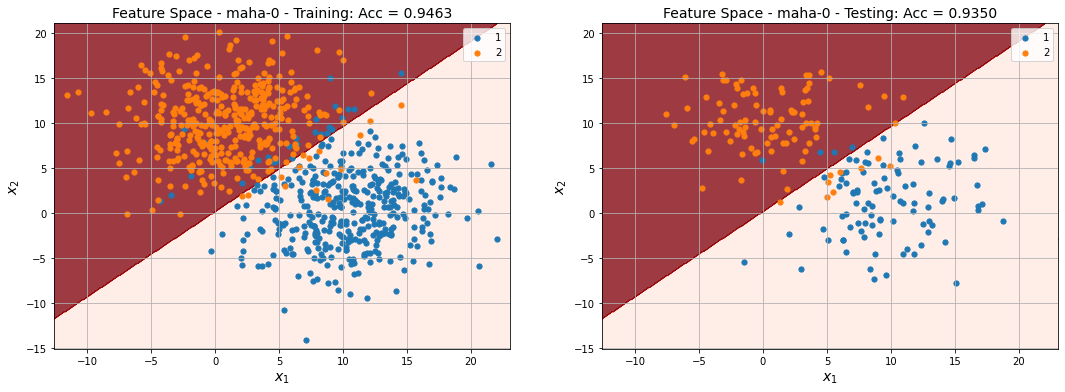

In [ ]:
# Mahalanobis - 0 : Las matrices de covarainzas son iguales
clf = Mahalanobis(covi=0)
clf.fit(Xtrain, ytrain)
ypred        = clf.predict(Xtest)
y0           = clf.predict(Xtrain)

show_clf_results(clf,Xtrain,ytrain,
                 Xtest,ytest,y0,ypred,'maha-0')    # show performance and feature space

## Mahalanobis (original)


Training:
Confusion Matrix:
[[375  25]
 [ 18 382]]
Accuracy = 94.62
Testing:
Confusion Matrix:
[[96  4]
 [10 90]]
Accuracy = 93.00


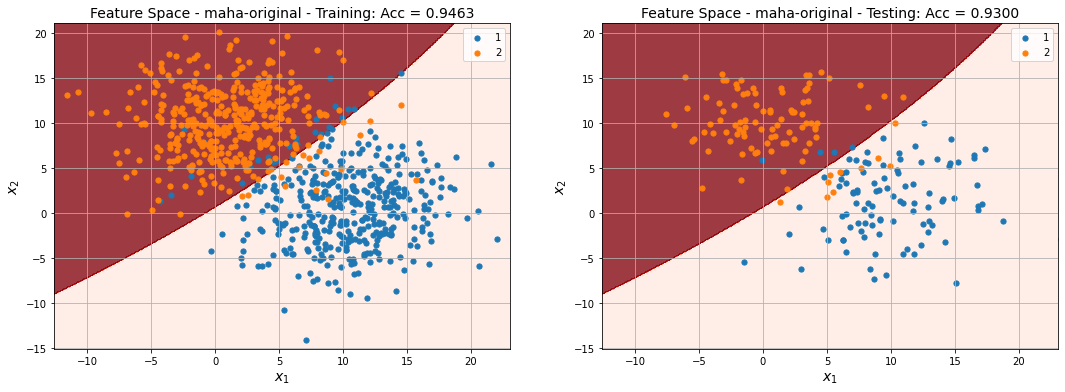

In [ ]:
# Mahalanobis: Las matrices de covarainzas son distintas

clf = Mahalanobis()
clf.fit(Xtrain, ytrain)
ypred        = clf.predict(Xtest)
y0           = clf.predict(Xtrain)

show_clf_results(clf,Xtrain,ytrain,
                 Xtest,ytest,y0,ypred,'maha-original')    # show performance and feature space

# Trees

## Árboles de decisión

Training:
Confusion Matrix:
[[375  25]
 [ 13 387]]
Accuracy = 95.25
Testing:
Confusion Matrix:
[[92  8]
 [ 7 93]]
Accuracy = 92.50


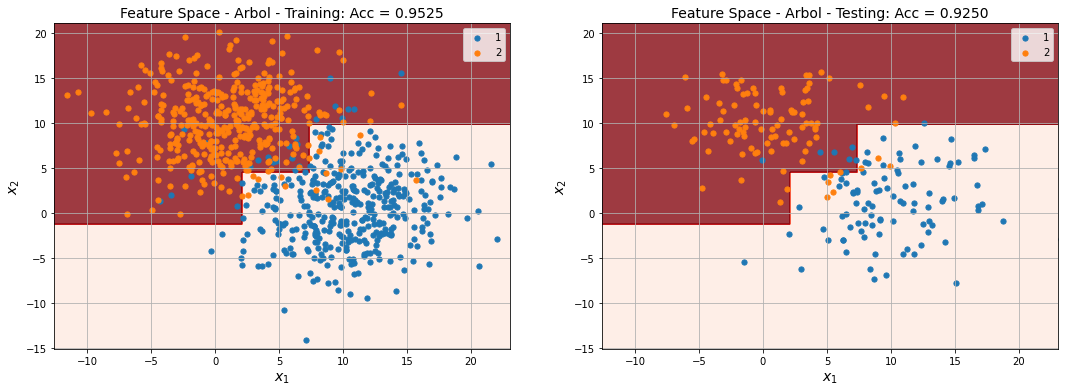

In [ ]:
from sklearn.tree import DecisionTreeClassifier

clf = DecisionTreeClassifier(max_depth=3)
clf.fit(Xtrain, ytrain)
ypred        = clf.predict(Xtest)
y0           = clf.predict(Xtrain)

show_clf_results(clf,Xtrain,ytrain,
                 Xtest,ytest,y0,ypred,'Arbol')    # show performance and feature space

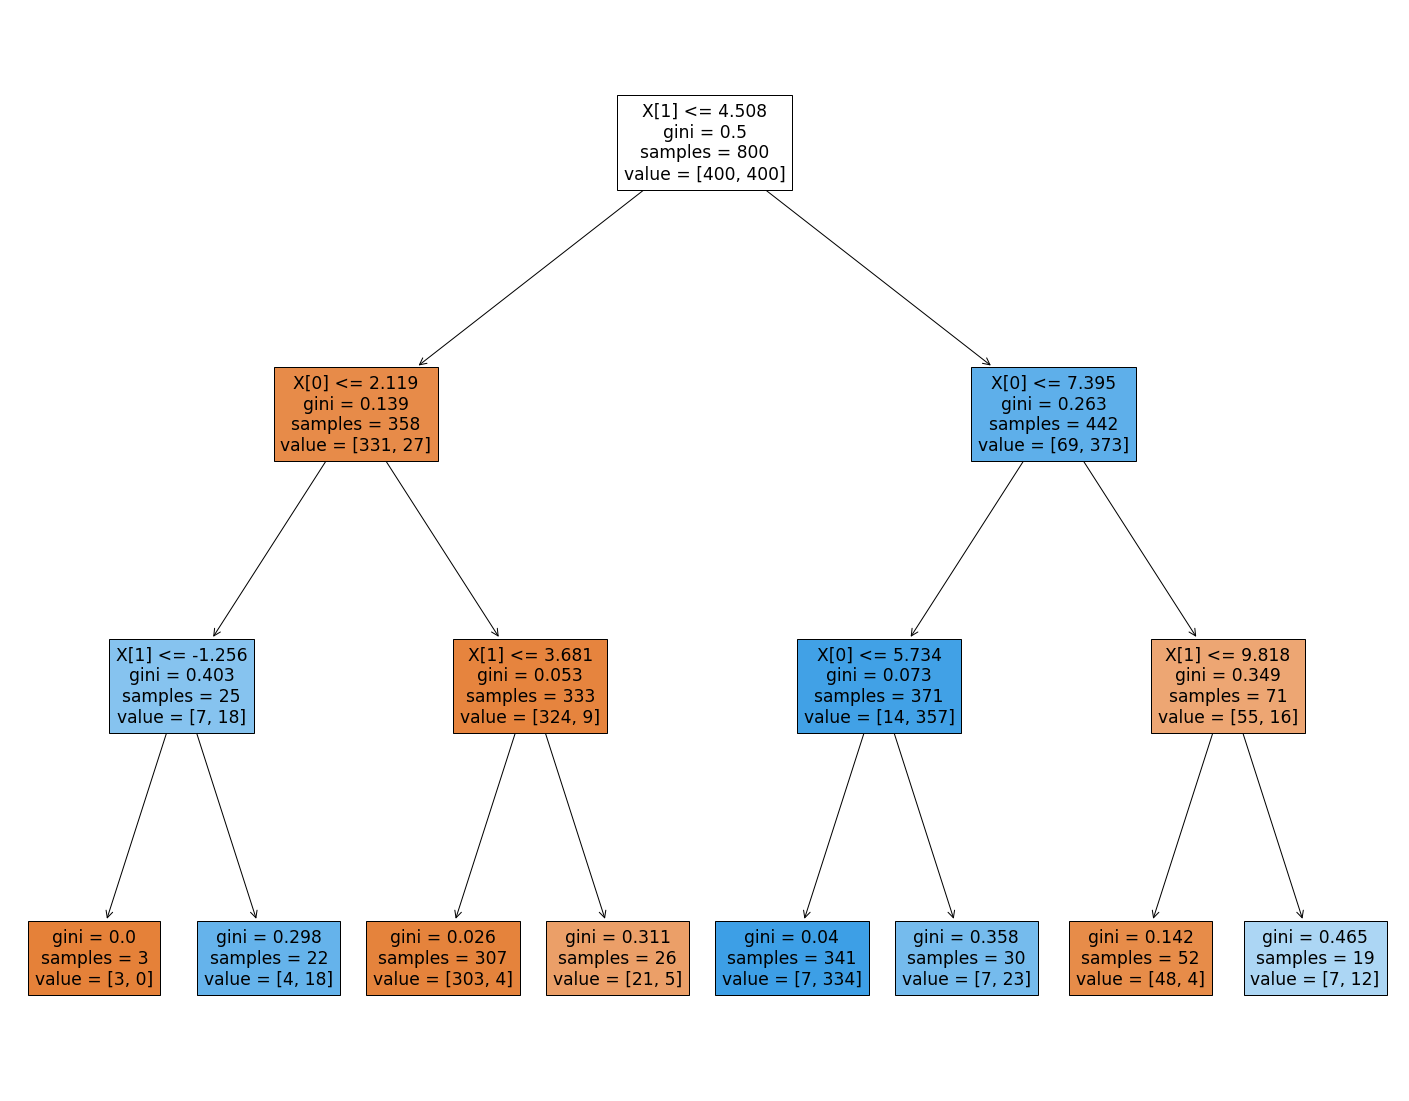

In [ ]:
from sklearn.tree import plot_tree

fig = plt.figure(figsize=(25,20))

x = plot_tree(clf,filled=True)

Training:
Confusion Matrix:
[[331  69]
 [ 27 373]]
Accuracy = 88.00
Testing:
Confusion Matrix:
[[73 27]
 [ 8 92]]
Accuracy = 82.50


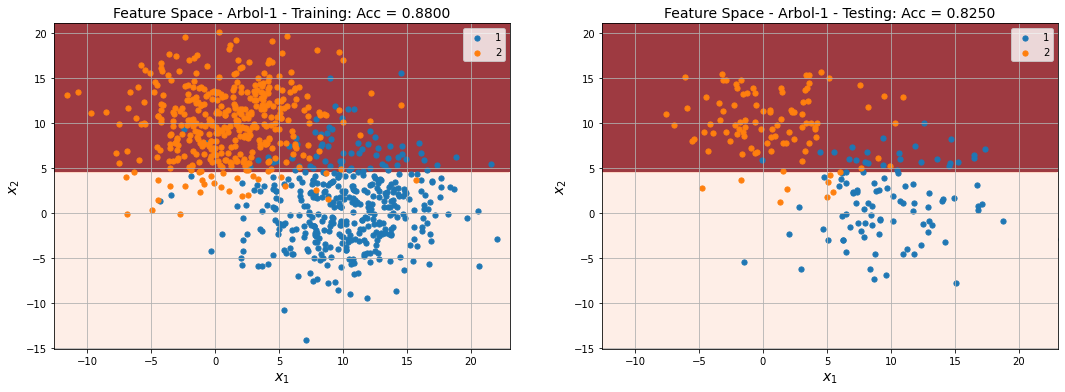

Training:
Confusion Matrix:
[[379  21]
 [ 25 375]]
Accuracy = 94.25
Testing:
Confusion Matrix:
[[91  9]
 [12 88]]
Accuracy = 89.50


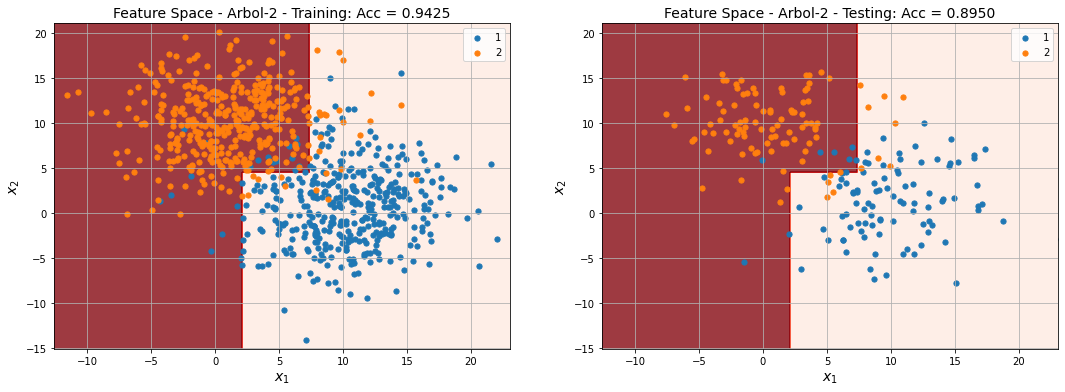

Training:
Confusion Matrix:
[[375  25]
 [ 13 387]]
Accuracy = 95.25
Testing:
Confusion Matrix:
[[92  8]
 [ 7 93]]
Accuracy = 92.50


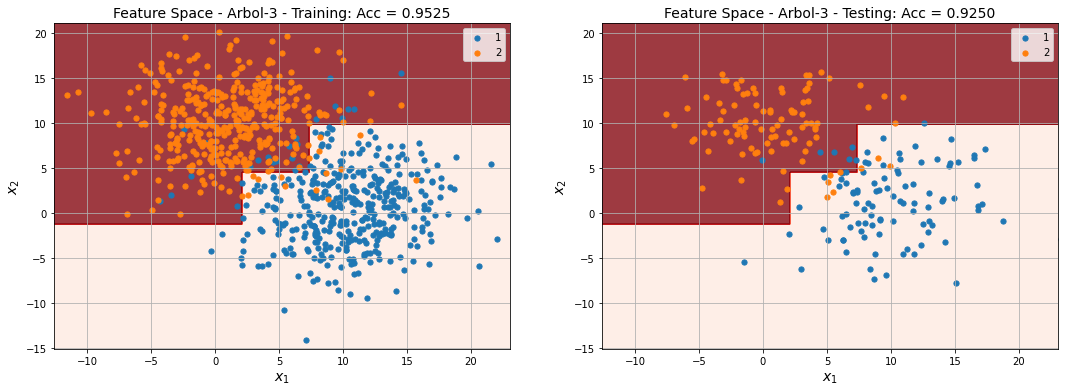

Training:
Confusion Matrix:
[[374  26]
 [ 10 390]]
Accuracy = 95.50
Testing:
Confusion Matrix:
[[91  9]
 [ 6 94]]
Accuracy = 92.50


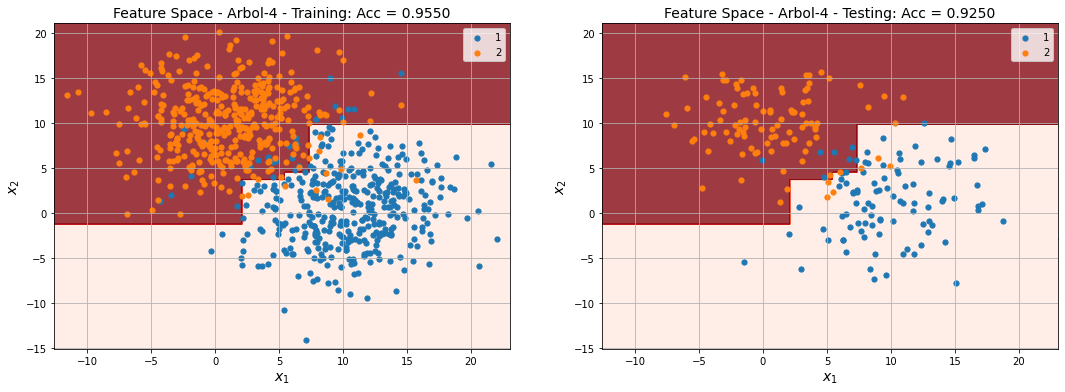

Training:
Confusion Matrix:
[[386  14]
 [ 12 388]]
Accuracy = 96.75
Testing:
Confusion Matrix:
[[90 10]
 [12 88]]
Accuracy = 89.00


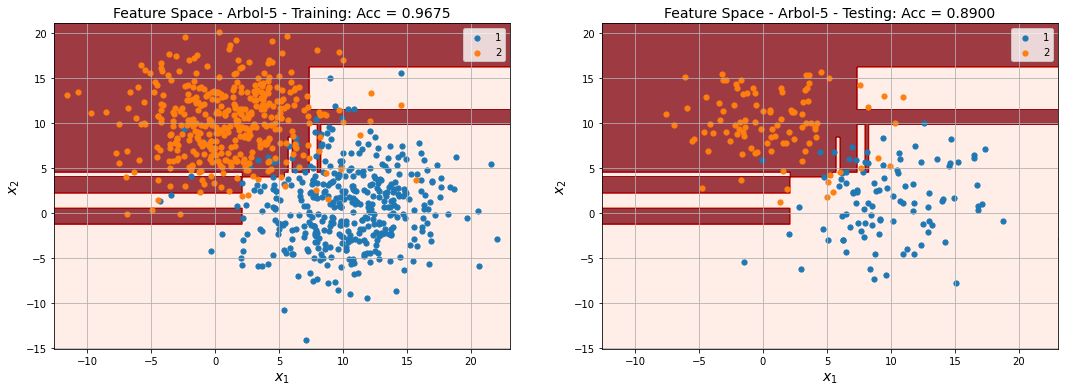

Training:
Confusion Matrix:
[[393   7]
 [ 10 390]]
Accuracy = 97.88
Testing:
Confusion Matrix:
[[91  9]
 [12 88]]
Accuracy = 89.50


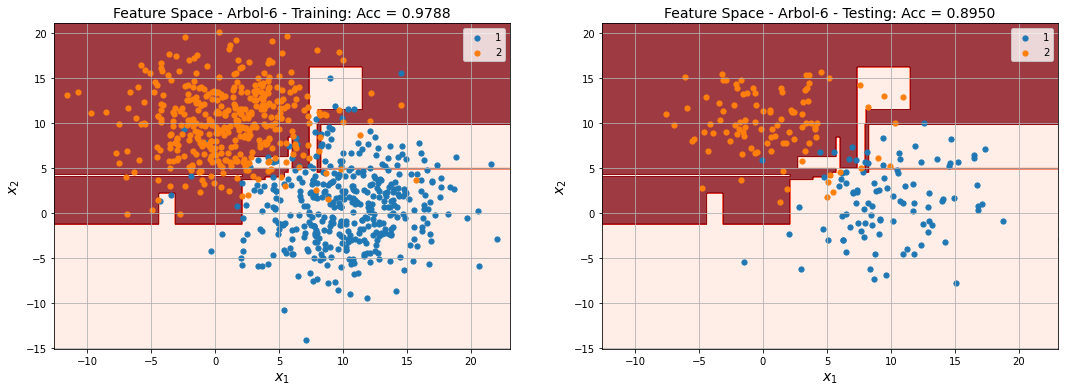

Training:
Confusion Matrix:
[[395   5]
 [  5 395]]
Accuracy = 98.75
Testing:
Confusion Matrix:
[[91  9]
 [13 87]]
Accuracy = 89.00


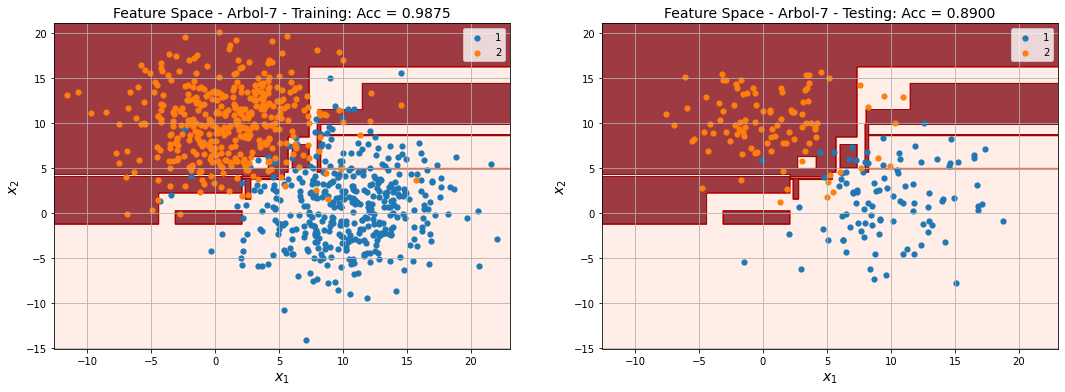

In [ ]:
# Entrenamiento con árboles de distintas profunidades

for j in range(7):
  clf = DecisionTreeClassifier(max_depth=j+1)
  clf.fit(Xtrain, ytrain)
  ypred        = clf.predict(Xtest)
  y0           = clf.predict(Xtrain)

  show_clf_results(clf,Xtrain,ytrain,
                 Xtest,ytest,y0,ypred,'Arbol-'+str(j+1))    # show performance and feature space

## Random Forest

Training:
Confusion Matrix:
[[383  17]
 [ 16 384]]
Accuracy = 95.88
Testing:
Confusion Matrix:
[[94  6]
 [10 90]]
Accuracy = 92.00


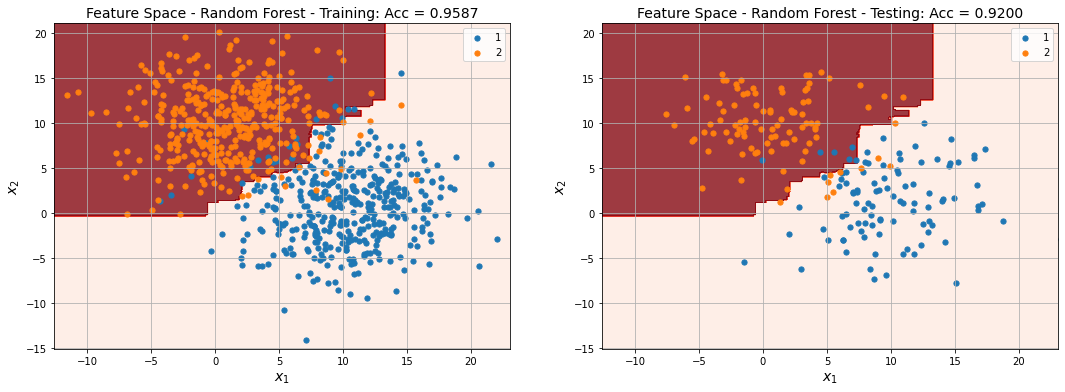

In [ ]:
from sklearn.ensemble import RandomForestClassifier

clf = RandomForestClassifier(max_depth=3)
clf.fit(Xtrain, ytrain)
ypred        = clf.predict(Xtest)
y0           = clf.predict(Xtrain)

show_clf_results(clf,Xtrain,ytrain,
                 Xtest,ytest,y0,ypred,'Random Forest')    # show performance and feature space

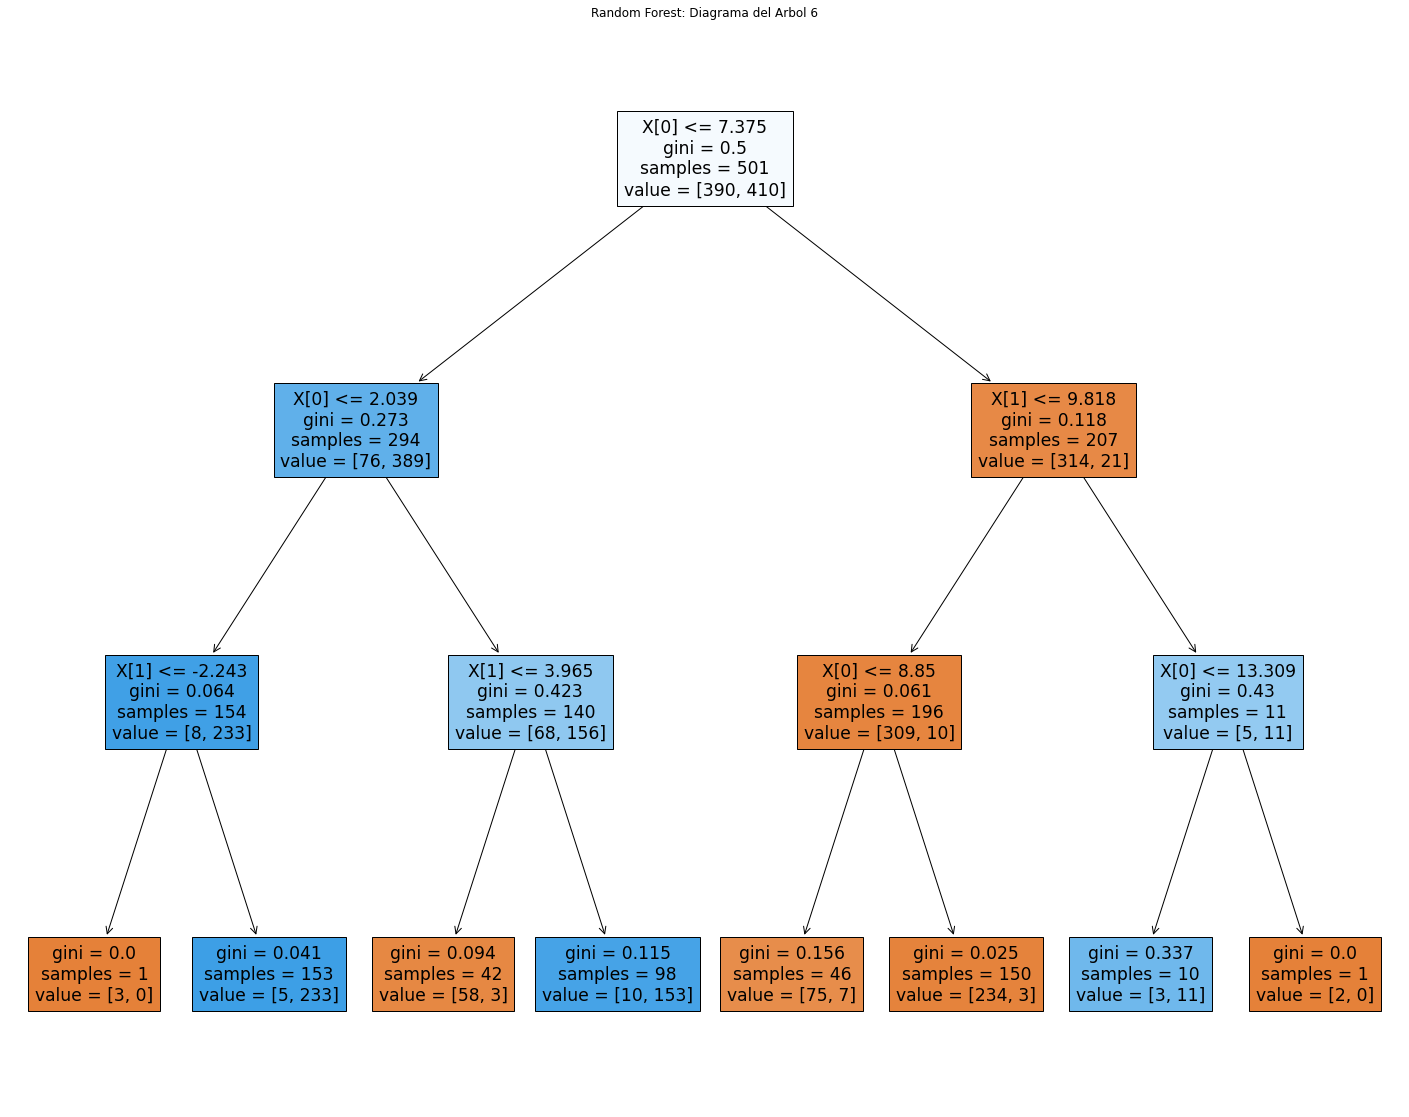

In [ ]:
# Gráfico de uno de los árboles encontrados

fig = plt.figure(figsize=(25,20))
n_arbol = 6
x = plot_tree(clf.estimators_[n_arbol],filled=True)
x = plt.title('Random Forest: Diagrama del Arbol '+str(n_arbol))